In [28]:
import pandas as pd
import numpy as np

In [29]:
fundamentals = pd.read_csv('prices.csv')

In [30]:
fundamentals.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [31]:
prices = pd.read_csv('prices.csv')

In [32]:
prices.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [33]:
prices.shape

(851264, 7)

In [34]:
prices.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,70.836986,70.857109,70.118414,71.543476,5.415113e+06
std,83.695876,83.689686,82.877294,84.465504,1.249468e+07
min,0.850000,0.860000,0.830000,0.880000,0.000000e+00
25%,33.840000,33.849998,33.480000,34.189999,1.221500e+06
50%,52.770000,52.799999,52.230000,53.310001,2.476250e+06
75%,79.879997,79.889999,79.110001,80.610001,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [35]:
prices.dropna(inplace = True)

In [36]:
prices.drop(['open','low','high','volume','symbol'],axis=1,inplace=True)

In [37]:
prices.head()

,date,close
0,2016-01-05 00:00:00,125.839996
1,2016-01-06 00:00:00,119.980003
2,2016-01-07 00:00:00,114.949997
3,2016-01-08 00:00:00,116.620003
4,2016-01-11 00:00:00,114.970001


In [38]:
prices['date']=pd.to_datetime(prices['date'],format='mixed')

In [39]:
prices.set_index('date',inplace=True)

In [40]:
prices.head()

,close
date,
2016-01-05,125.839996
2016-01-06,119.980003
2016-01-07,114.949997
2016-01-08,116.620003
2016-01-11,114.970001


In [41]:
import matplotlib.pyplot as plt

<Axes: xlabel='date'>

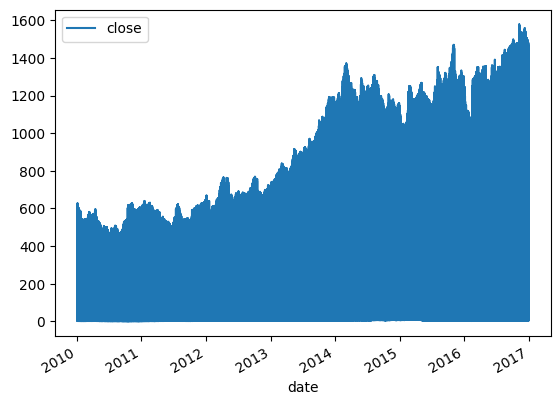

In [42]:
prices.plot()

In [43]:
pip show scikit-learn


Name: scikit-learn
Version: 1.6.1
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: BSD 3-Clause License

 Copyright (c) 2007-2024 The scikit-learn developers.
 All rights reserved.

 Redistribution and use in source and binary forms, with or without
 modification, are permitted provided that the following conditions are met:

 * Redistributions of source code must retain the above copyright notice, this
   list of conditions and the following disclaimer.

 * Redistributions in binary form must reproduce the above copyright notice,
   this list of conditions and the following disclaimer in the documentation
   and/or other materials provided with the distribution.

 * Neither the name of the copyright holder nor the names of its
   contributors may be used to endorse or promote products derived from
   this software without specific prior written permission.

 THIS SOFTWARE IS PROVIDED BY THE COPYR

In [44]:
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [45]:
x_train,x_test= train_test_split(prices[['close']],test_size=0.2,random_state=42)

In [46]:
x_train.shape

(681011, 1)

In [47]:
scaler = MinMaxScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [48]:
data_1d = x_train_scaled.flatten()
test_1d= x_test_scaled.flatten()

In [49]:
import numpy as np

def create_sequences(data, lookback_window=60):

    X, y = [], []
    for i in range(len(data) - lookback_window):
        # Define the end of the input sequence
        end_ix = i + lookback_window

        # Gather input sequence from history [i to i + T]
        seq_x = data[i:end_ix]

        # Gather output target value [i + T]
        seq_y = data[end_ix]

        X.append(seq_x)
        y.append(seq_y)


    return np.array(X), np.array(y)



In [50]:
LOOKBACK_T = 60


x_train_3d, y_train_targets = create_sequences(data_1d, LOOKBACK_T)
x_test_3d, y_test_targets= create_sequences(test_1d, LOOKBACK_T)



### done preprocessing

In [51]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

# Define the Lookback Window (T) and Features (F) from our data processing step
LOOKBACK_T = 60 # Time steps (T)
FEATURES_F = 1  # Number of features (F)

# Define the input shape required by the first LSTM layer
# This matches our X_train_3d shape: (T, Features) -> (60, 1)
input_shape = (LOOKBACK_T, FEATURES_F)

# --- Construct the Sequential Model (FinNet-T) ---
model = Sequential(name="FinNet-T")

# Layer 1: LSTM layer (50 units) - MUST return sequences
model.add(LSTM(
    units=50,
    return_sequences=True, # Key parameter: Passes output sequence to the next LSTM
    input_shape=input_shape,
    name='LSTM_1'
))

# Layer 2: Dropout layer (0.2) for regularization
model.add(Dropout(
    rate=0.2,
    name='Dropout_1'
))

# Layer 3: LSTM layer (50 units) - MUST NOT return sequences
model.add(LSTM(
    units=50,
    return_sequences=False, # Key parameter: Only outputs the final hidden state
    name='LSTM_2'
))

# Layer 4 (Output): Dense layer with single unit (linear activation for regression)
model.add(Dense(
    units=1,
    activation='linear', # Standard for predicting continuous values (like stock prices)
    name='Output_Dense'
))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [52]:
print(model.summary())

Model: "FinNet-T"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ LSTM_1 (LSTM)                   │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_1 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ LSTM_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Dense (Dense)            │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

None


In [53]:
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mean_absolute_error']
)

In [54]:
history = model.fit(
    x_train_3d,
    y_train_targets,
    epochs=5,
    batch_size=32,
    validation_split=0.2,
    shuffle=False
)

Epoch 1/5
 8750/17024 ━━━━━━━━━━━━━━━━━━━━ 7:19 53ms/step - loss: 0.0028 - mean_absolute_error: 0.0263

KeyboardInterrupt: 

In [55]:
predictions_scaled = model.predict(x_test_3d)

5319/5319 ━━━━━━━━━━━━━━━━━━━━ 80s 15ms/step


In [56]:
# Inverse transform the predictions back to original scale
predictions_actual = scaler.inverse_transform(predictions_scaled)

In [57]:
actual_targets_reshaped = y_test_targets.reshape(-1, 1)
# Inverse transform the actual targets back to original scale
actual_targets = scaler.inverse_transform(actual_targets_reshaped)
# actual_targets is now a 2D NumPy array of original dollar amounts

In [58]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(actual_targets, predictions_actual)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(actual_targets, predictions_actual)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print(f"--- Model Performance Metrics on Unscaled Test Data ---")
print(f"Mean Absolute Error (MAE): ${mae:,.4f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:,.4f}")


--- Model Performance Metrics on Unscaled Test Data ---
Mean Absolute Error (MAE): $41.8335
Root Mean Squared Error (RMSE): $83.5704


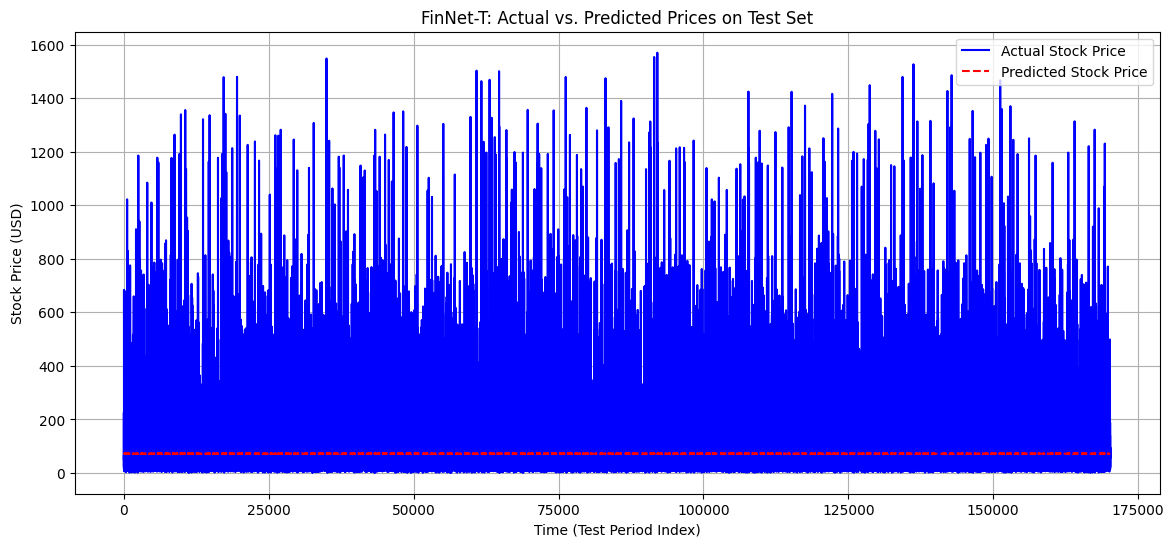

In [59]:
import matplotlib.pyplot as plt
import pandas as pd

LOOKBACK_T = 60

plt.figure(figsize=(14, 6))
plt.plot(actual_targets, color='blue', label='Actual Stock Price')
plt.plot(predictions_actual, color='red', linestyle='--', label='Predicted Stock Price')
plt.title('FinNet-T: Actual vs. Predicted Prices on Test Set')
plt.xlabel('Time (Test Period Index)')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

